## Import Dependency

In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Import CSV

In [2]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaGamesStats.csv"))
df = df.dropna()
df.head()

,ID,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


## Create a Train Test Split

In [3]:
target = df["WINorLOSS"]
target_names = ["W", "L"]

In [4]:
data = df.drop(["WINorLOSS","ID","Date","Game","Home","Opponent","Team"], axis=1)
feature_names = data.columns
data.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,102,109,40,80,0.500,13,22,0.591,9,17,...,27,33,0.818,16,48,26,13,9,9,22
1,102,92,35,69,0.507,7,20,0.350,25,33,...,18,21,0.857,11,44,25,5,5,18,26
2,92,94,38,92,0.413,8,25,0.320,8,11,...,27,38,0.711,11,50,25,7,9,19,15
3,119,122,43,93,0.462,13,33,0.394,20,26,...,20,27,0.741,11,51,31,6,7,19,30
4,103,96,33,81,0.407,9,22,0.409,28,36,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

## Train the Model - Random Forest

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.989430894308943

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9735772357723578

In [8]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.17274386467089525, 'TeamPoints'),
 (0.16420842479128286, 'OpponentPoints'),
 (0.09244402356846965, 'OppFieldGoals_pct'),
 (0.08283231393862991, 'FieldGoals_pct'),
 (0.0539852312418251, 'OppFieldGoals'),
 (0.04962826276176514, 'FieldGoals'),
 (0.029909872099261565, 'X3PointShots_pct'),
 (0.028409813066307563, 'Opp3PointShots_pct'),
 (0.021689095800039054, 'OppFreeThrows'),
 (0.021652399209888314, 'OppAssists'),
 (0.021385438523995864, 'OppTotalRebounds'),
 (0.01982736128895102, 'Assists'),
 (0.019513599030856307, 'FreeThrows'),
 (0.016880091079825226, 'TotalRebounds'),
 (0.01651247016299826, 'FreeThrowsAttempted'),
 (0.016512166745979103, 'OppFreeThrowsAttempted'),
 (0.014797141621099845, 'Opp3PointShots'),
 (0.014091367563773693, 'X3PointShots'),
 (0.012773887578439502, 'TotalFouls'),
 (0.012054524376562237, 'OppTotalFouls'),
 (0.010389102146651221, 'Turnovers'),
 (0.010075221985963336, 'OppFreeThrows_pct'),
 (0.009887411412854862, 'FreeThrows_pct'),
 (0.009685356669740967, 'OppTur

## Hyperparameter Tuning

In [9]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[200,500,1000]}
 
grid = GridSearchCV(rf,param_grid, verbose=3)

In [10]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=200, score=0.978, total=   1.5s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.982, total=   1.4s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.967, total=   1.5s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.976, total=   1.5s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.974, total=   1.4s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.978, total=   3.9s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.979, total=   4.0s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.972, total=   3.5s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.970, total=   3.5s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'n_estimators': [200, 500, 1000]}, verbose=3)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 1000}
0.9765582655826558


## RF plot - Bar

In [12]:
features = feature_names
importances = clf.feature_importances_
indices = np.argsort(importances)

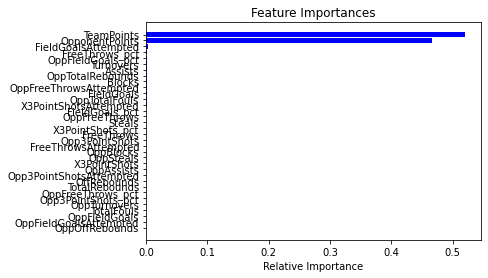

In [13]:
fig = plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
# # Save figure
# fig.savefig("../NBA_Img/RF_bar.png",dpi=100)

## RF plot - Tree

In [15]:
fn =feature_names
cn=target_names

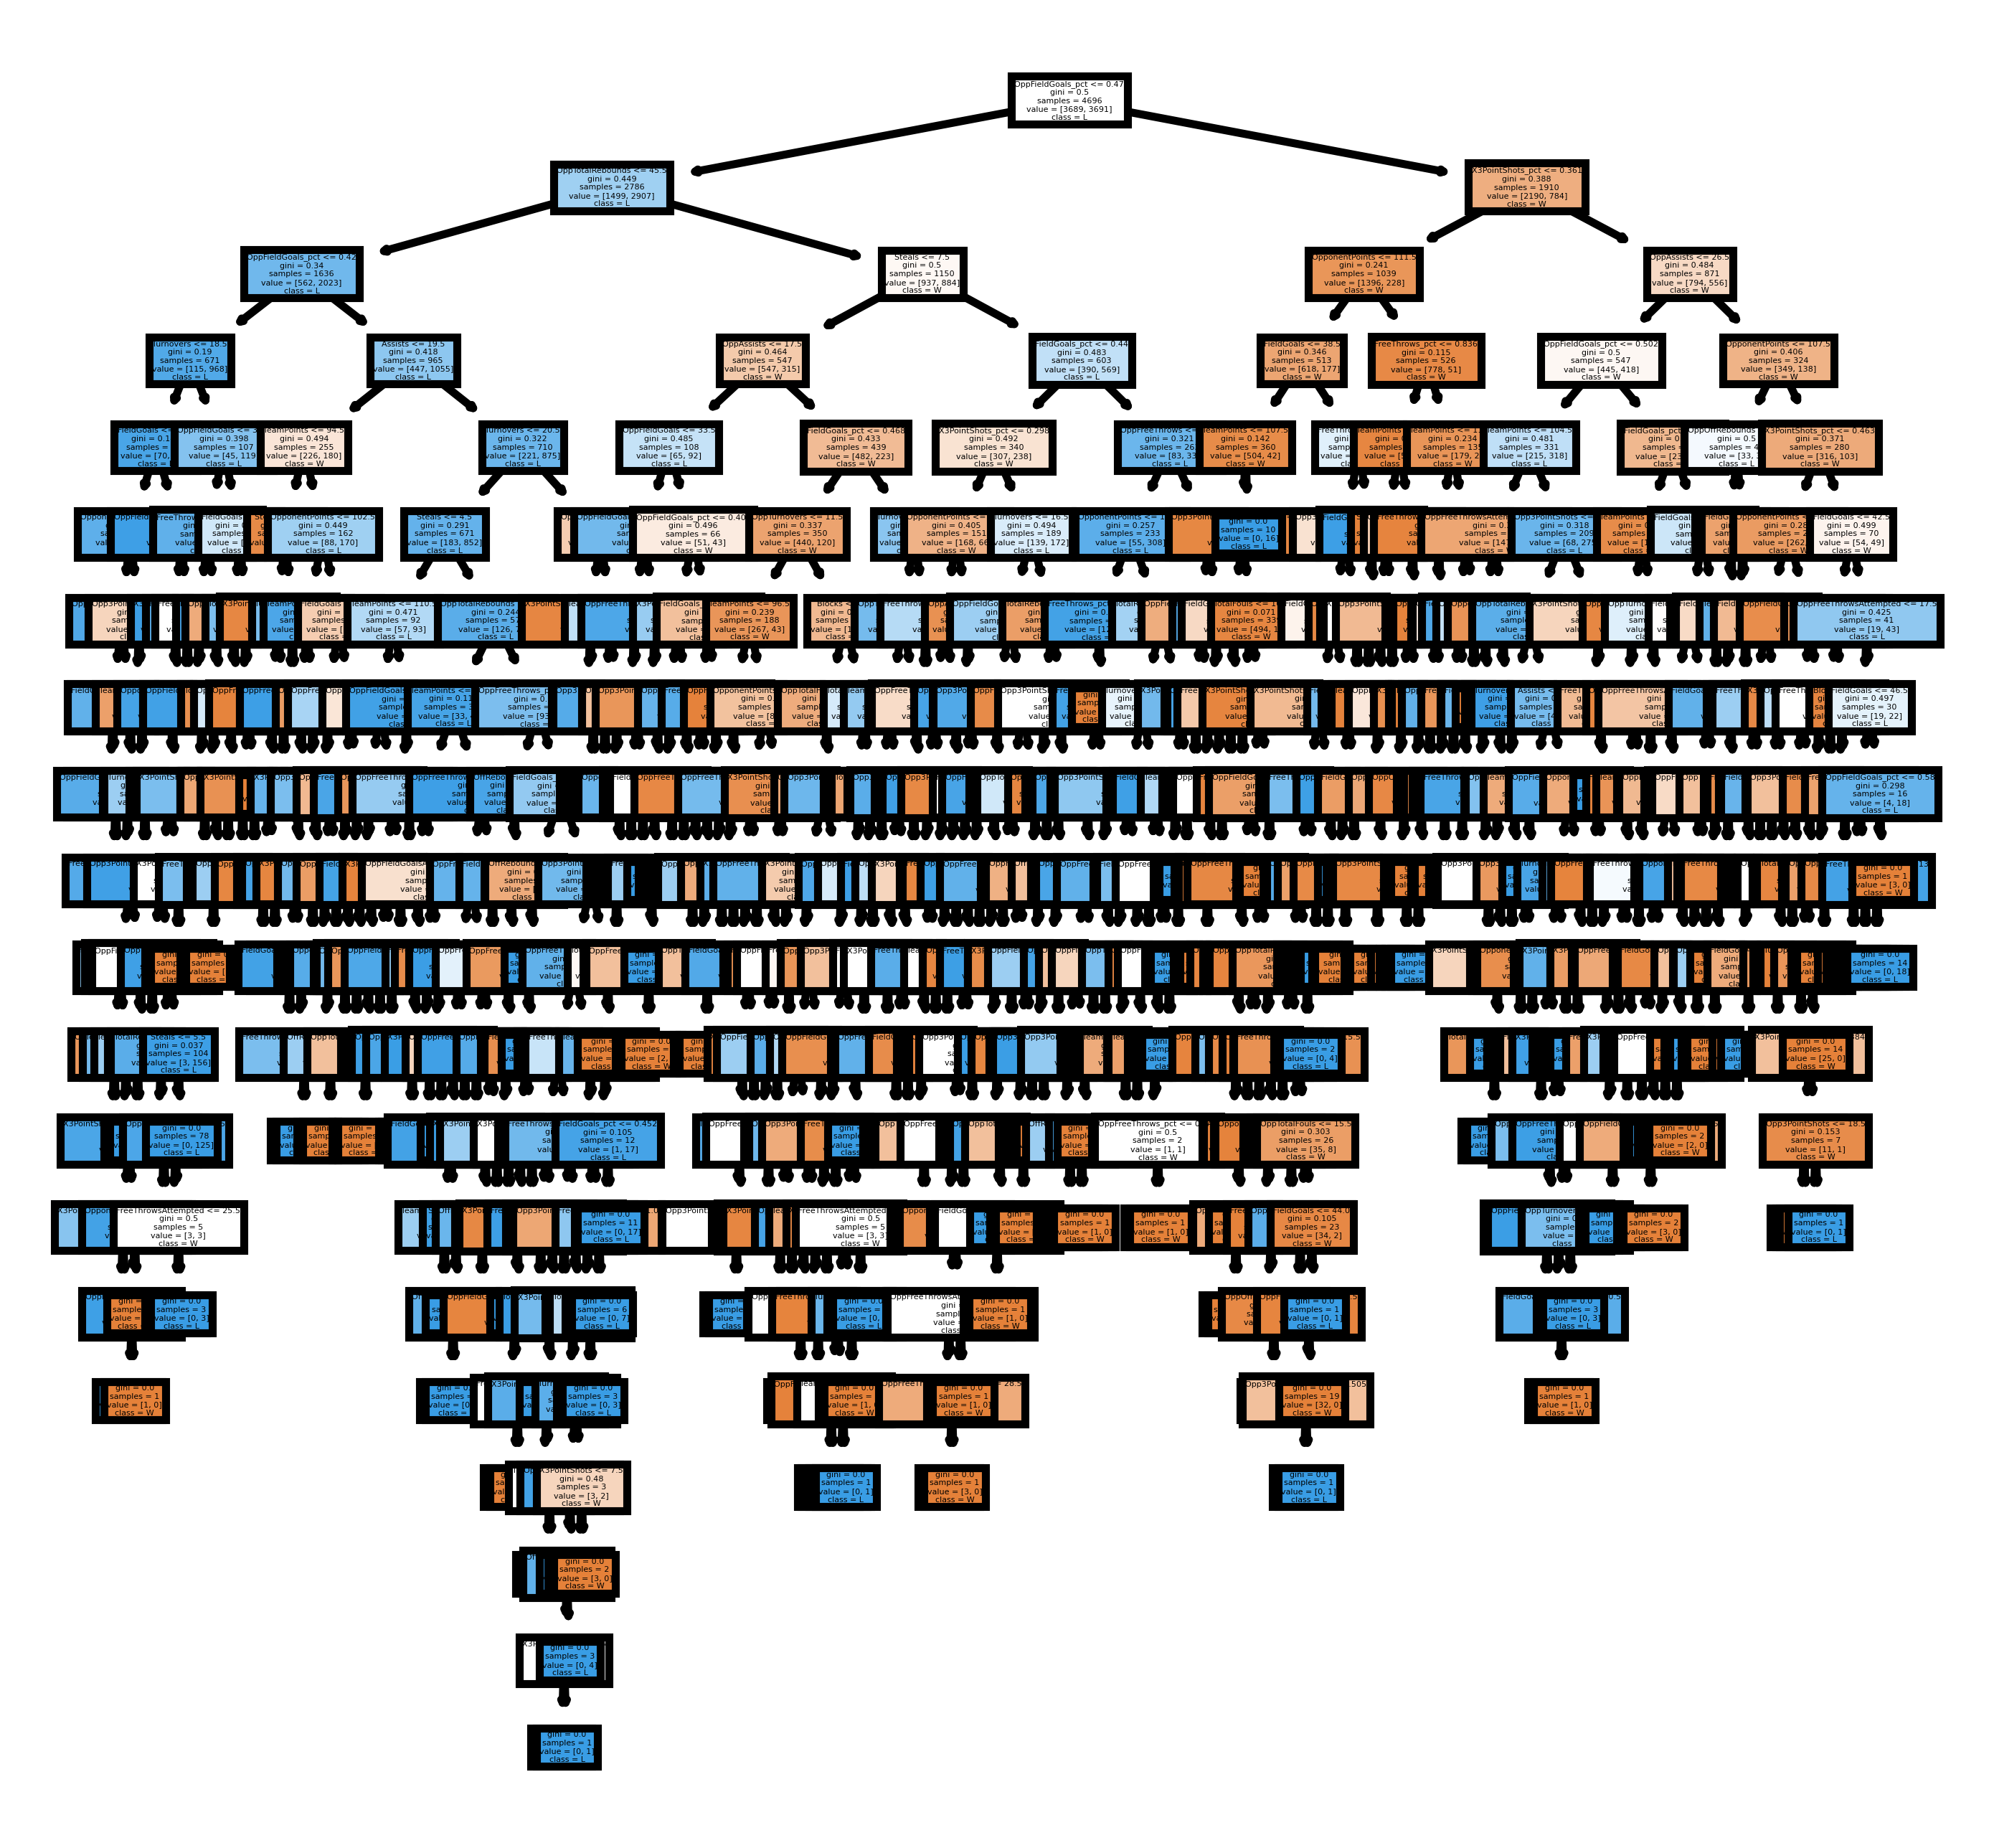

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [17]:
# # Save figure
# fig.savefig('../NBA_Img/RF_tree.png')